<a href="https://colab.research.google.com/github/amarathe/RetinalRecognition/blob/master/project_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Retinal OCT Images recognition
# Sharanjeet Singh, Ashwin Marathe
Classify images of retina
4 categories: 
    CNV - Choroidal neovascularization
    DME -  Diabetic macular edema 
    DRUSEN - Multiple drusen
    NORMAL - Normal retina

84,000 images in dataset
    
https://www.kaggle.com/paultimothymooney/kermany2018/data#CNV-1016042-2.jpeg

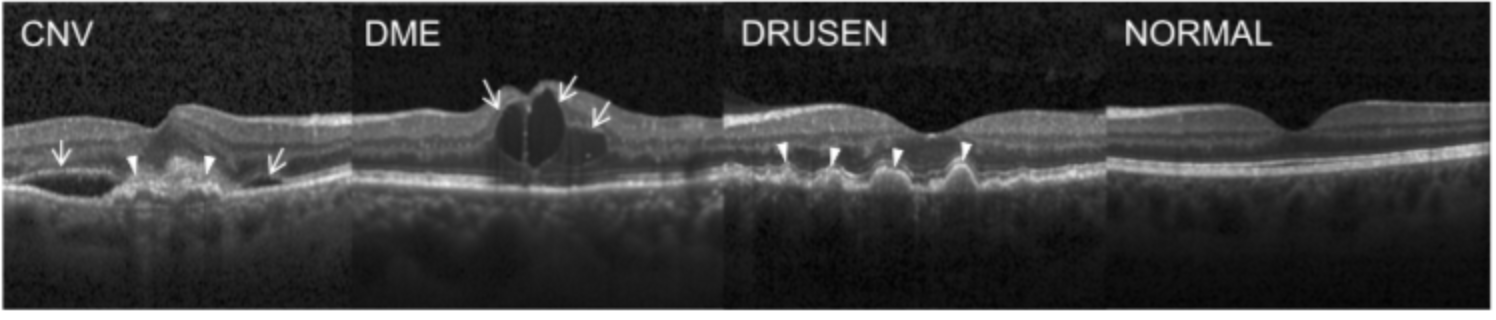

In [0]:
%matplotlib inline
from IPython.display import Image
#from IPython import display
Image(filename='project_classifications.png') 

# Image characteristics

In [0]:

from PIL import Image as IMG
image = IMG.open("/Users/ashwinmarathe/Documents/ELEN521/project/OCT2017/OCT2017 /train/CNV/CNV-1016042-1.jpeg")
#Image details
print("format:", image.format)
print("mode:", image.mode)
print("size:", image.size)

format: JPEG
mode: L
size: (512, 496)


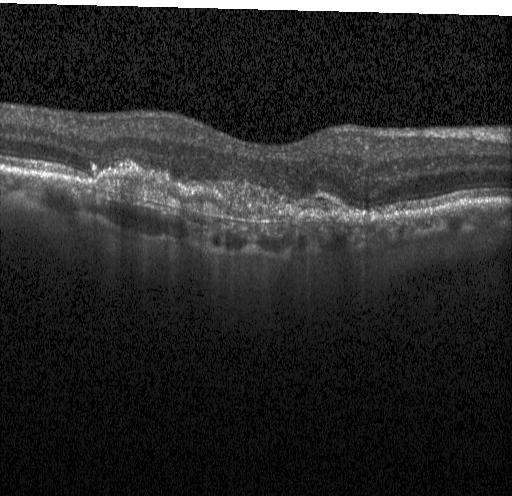

In [0]:
Image(filename="/Users/ashwinmarathe/Documents/ELEN521/project/OCT2017/OCT2017 /train/CNV/CNV-1016042-1.jpeg")


In [0]:
from os import listdir
from matplotlib import image
from scipy.special import comb
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time
import pandas as pd

#Load 100 images
def loadFromDir(location, x, y, yval, n=100):
    for filename in listdir(location)[:100]:
        img_data = image.imread(location + filename)
        #Make this uniform size
        img_data = cv2.resize(img_data, dsize=(496, 512), interpolation=cv2.INTER_CUBIC)
        x.append(img_data)
        y.append(yval)
        
    
x_train = []
y_train = []
location = "/Users/ashwinmarathe/Documents/ELEN521/project/OCT2017/OCT2017 /train/CNV/"
loadFromDir(location, x_train, y_train, 1)
location = "/Users/ashwinmarathe/Documents/ELEN521/project/OCT2017/OCT2017 /train/DME/"
loadFromDir(location, x_train, y_train, 2)
location = "/Users/ashwinmarathe/Documents/ELEN521/project/OCT2017/OCT2017 /train/DRUSEN/"
loadFromDir(location, x_train, y_train, 3)
location = "/Users/ashwinmarathe/Documents/ELEN521/project/OCT2017/OCT2017 /train/NORMAL/"
loadFromDir(location, x_train, y_train, 4)

print ("x_train[0] dim:", x_train[0].shape)
print ("x_train[1] dim:", x_train[1].shape)
print ("x_train[2] dim:", x_train[2].shape)
print ("x_train[3] dim:", x_train[3].shape)

x_train = np.vstack(np.expand_dims(x_train, axis=0))
y_train = np.vstack(np.array(y_train))
print ("x_train shape:", x_train.shape)
print ("y_train shape:", y_train.shape)

    

x_train[0] dim: (512, 496)
x_train[1] dim: (512, 496)
x_train[2] dim: (512, 496)
x_train[3] dim: (512, 496)
x_train shape: (400, 512, 496)
y_train shape: (400, 1)


x_train shape (400, 512, 496)


<Figure size 432x288 with 0 Axes>

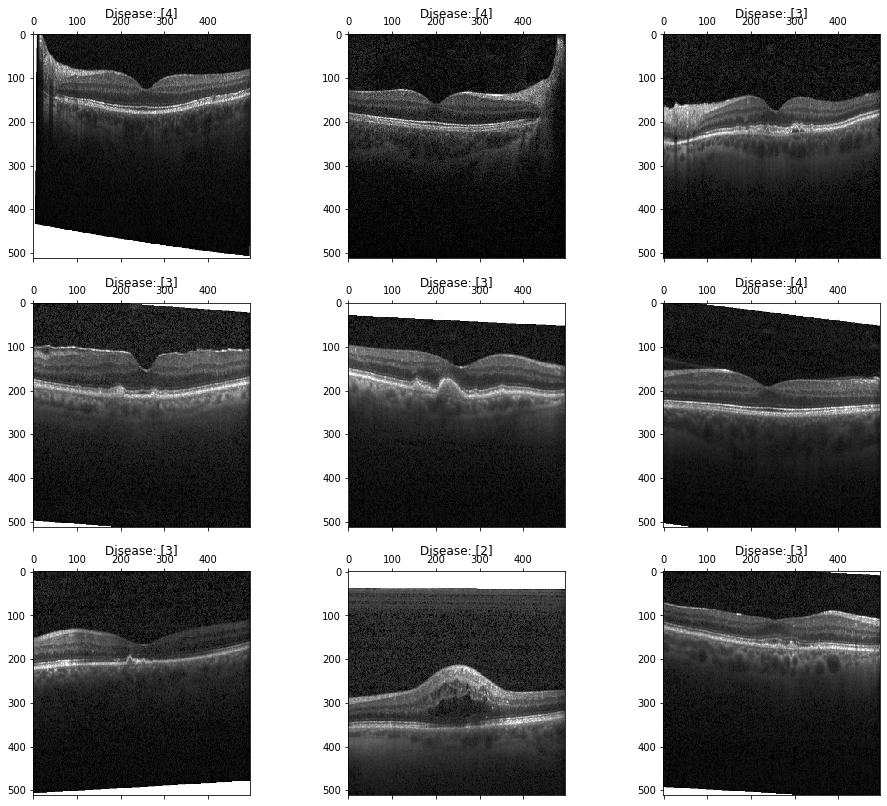

In [0]:
indexes = x_train.shape[0]
print ("x_train shape", x_train.shape)
indexes = np.random.permutation(indexes)
indexes

x_train = x_train[indexes]
y_train = y_train[indexes]

plt.gray()
fig = plt.figure( figsize=(16,14) )
for i in range(0,9):
    x = x_train[i]
    y = y_train[i]
    ax = fig.add_subplot(3,3,i+1, title="Disease: {}".format(str(y)))
    ax.matshow(x)
plt.show()

In [0]:
print ("x_train.shape", x_train[0].shape)
print ("x_train:", x_train)
x_train_flatten = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
y_train_flatten = y_train.reshape(y_train.shape[0])
#x_train_flatten = x_train_flatten[0:1000]
#y_train_flatten = y_train_flatten[0:1000]
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_train_flatten)

x_train.shape (512, 496)
x_train: [[[255 254 255 ...  18  13  19]
  [255 254 255 ...   9  17  19]
  [255 254 255 ...   6  24  17]
  ...
  [255 255 255 ... 249 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 254 254]]

 [[  3  21  37 ...  20  19   1]
  [  1  21  28 ...  21  14   1]
  [ 17  29  16 ...  26  14   5]
  ...
  [  1   3   0 ...   2   2   3]
  [  1   3   0 ...   2   2   3]
  [  1   4   0 ...   1   0   0]]

 [[ 36   4  43 ...  13  12   1]
  [ 57  22  59 ...   1   2  10]
  [ 43  34  52 ...   9   0   4]
  ...
  [  2  11   3 ...   2   4   5]
  [  5  15   4 ...   2   4   4]
  [  8  17   4 ...   2   2   1]]

 ...

 [[255 255 255 ...   4 246 254]
  [255 255 255 ...   2 246 255]
  [255 255 255 ...   0 246 255]
  ...
  [  9  11  12 ... 255 255 255]
  [ 10  12  11 ... 255 255 255]
  [ 15  16  11 ... 255 255 255]]

 [[255 253 254 ...  27  21  31]
  [250 255 253 ...  26  20  30]
  [255 255 251 ...  23  20  28]
  ...
  [ 11  16  18 ... 255 255 255]
  [  9  12  11 ... 255 255

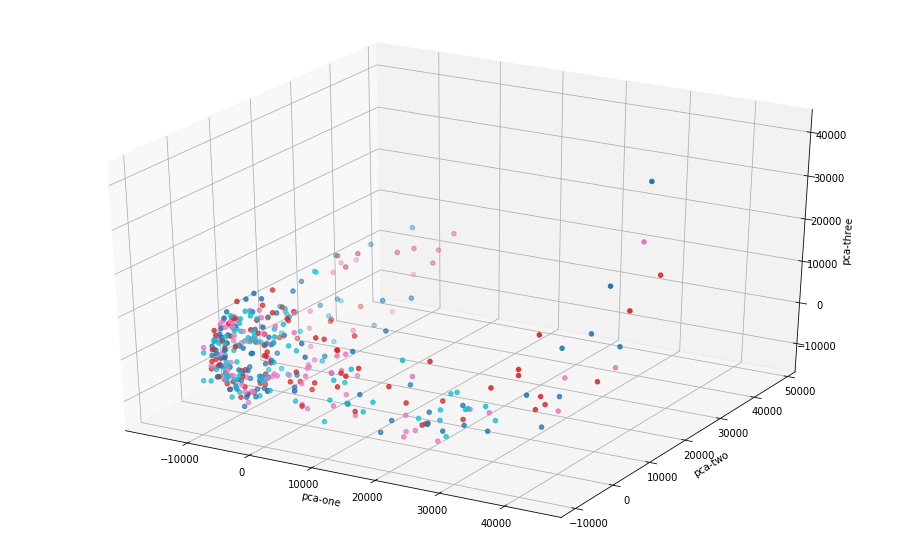

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y_train_flatten, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


In [0]:
# tSNE is very expensive to compute. Let's use only 400 samples
x_train_flatten = x_train_flatten[0:400]
y_train_flatten = y_train_flatten[0:400]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_train_flatten)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 400 samples in 3.140s...
[t-SNE] Computed neighbors for 400 samples in 66.997s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 7368.875355
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.548050
[t-SNE] KL divergence after 300 iterations: 0.609424
t-SNE done! Time elapsed: 71.72300624847412 seconds


In [0]:
data = {"x{}".format(i): x_train_flatten[:, i] for i in range(x_train_flatten.shape[1])}
data["y"] = y_train_flatten
df = pd.DataFrame(data)
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x253943,x253944,x253945,x253946,x253947,x253948,x253949,x253950,x253951,y
0,255,254,255,255,254,255,254,255,215,38,...,255,255,255,251,251,255,255,254,254,4
1,3,21,37,2,37,5,0,27,1,10,...,6,5,1,0,3,2,1,0,0,4
2,36,4,43,18,18,38,9,37,9,8,...,1,0,0,4,2,3,2,2,1,3
3,27,44,39,42,32,2,38,25,8,24,...,19,12,9,7,3,0,0,2,5,3
4,255,255,255,255,255,255,255,255,255,255,...,9,10,14,15,6,0,0,2,0,3
5,28,32,37,37,31,27,28,32,30,24,...,6,15,15,12,10,10,8,4,0,4
6,30,46,47,42,39,24,8,61,44,50,...,255,255,255,255,255,255,255,255,255,3
7,255,255,255,255,255,255,255,255,255,255,...,19,19,8,8,17,21,20,8,1,2
8,33,10,0,0,8,29,41,36,28,9,...,0,8,11,9,7,9,3,0,252,3
9,0,0,1,0,1,0,0,0,4,11,...,0,3,7,0,0,2,0,0,0,1


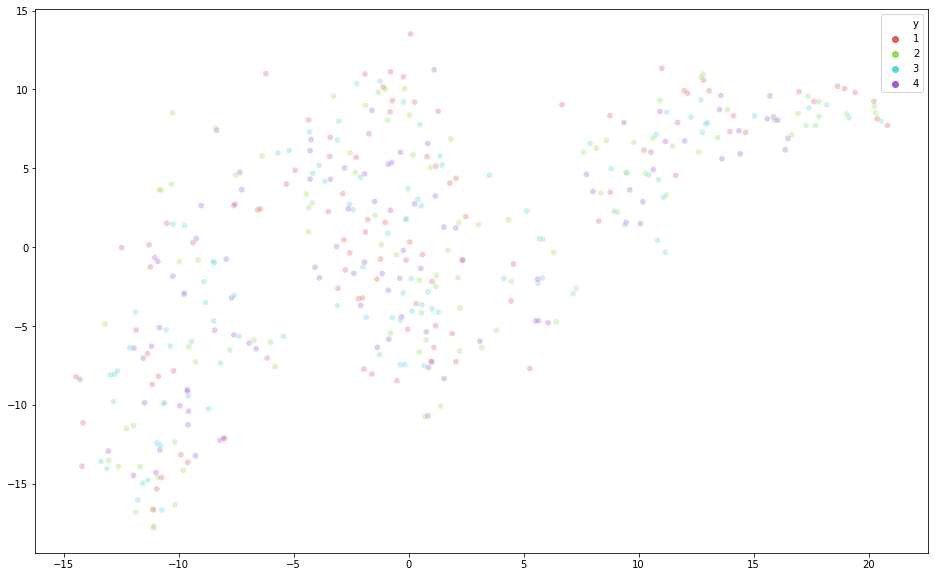

In [0]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df,
    legend="full",
    alpha=0.3
)

In [0]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_train_flatten)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8328700301983859


In [0]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_50)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 6913.068204
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.303345
[t-SNE] KL divergence after 300 iterations: 0.529172


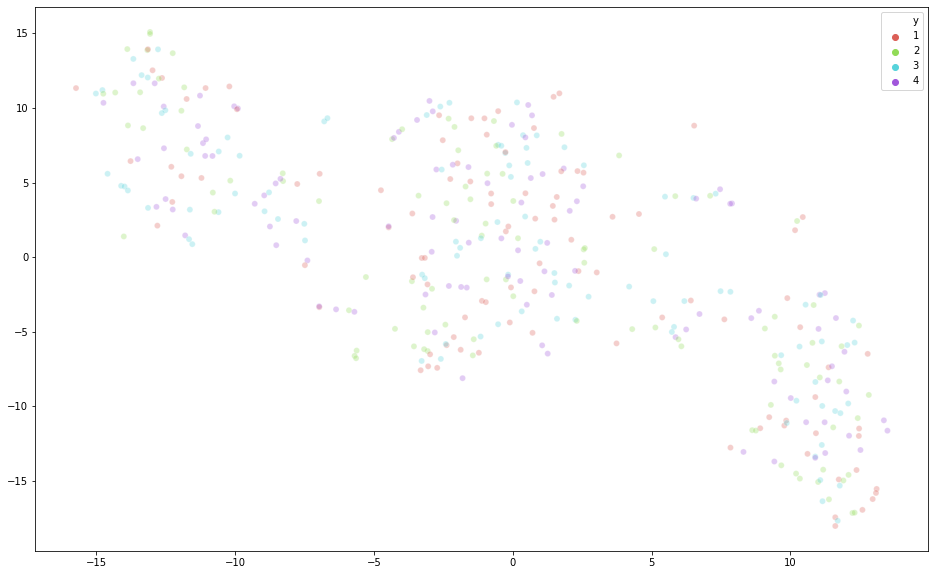

In [0]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df,
    legend="full",
    alpha=0.3
)